In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df=pd.read_csv('playstore-analysis (2) (1).csv')

In [75]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [76]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [78]:
df.shape

(10841, 13)

## 1. Data clean up – Missing value treatment
a. Drop records where rating is missing since rating is our target/study variable

In [79]:
df.groupby('Category')['Category'].agg('count')

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: Category, dtype: int64

In [80]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [81]:
df1=df.dropna(subset=['Rating'],how='any')
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [82]:
df1.groupby('Android Ver')['Android Ver'].agg('count')

Android Ver
1.0 and up               2
1.5 and up              16
1.6 and up              87
2.0 and up              27
2.0.1 and up             7
2.1 and up             113
2.2 and up             208
2.3 and up             582
2.3.3 and up           240
3.0 and up             211
3.1 and up               8
3.2 and up              31
4.0 and up            1131
4.0.3 - 7.1.1            2
4.0.3 and up          1240
4.1 - 7.1.1              1
4.1 and up            2059
4.2 and up             338
4.3 and up             207
4.4 and up             875
4.4W and up              6
5.0 - 6.0                1
5.0 - 8.0                2
5.0 and up             535
5.1 and up              18
6.0 and up              48
7.0 - 7.1.1              1
7.0 and up              41
7.1 and up               3
8.0 and up               5
Varies with device    1319
Name: Android Ver, dtype: int64

## Check the null values for the Android Ver column

In [83]:
df1['Android Ver'].isnull().sum() 

3

### i. Are all 3 records having the same problem?

In [84]:
series = pd.isnull(df1["Android Ver"])

In [85]:
df1[series]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [86]:
j = df1[((df1.App == 'Life Made WI-Fi Touchscreen Photo Frame'))].index

In [87]:
df1.drop(j)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## iii. Replace remaining missing values with the mode

In [88]:
df1['Android Ver']=df1['Android Ver'].fillna(df1['Android Ver'].mode()[0])

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

## Current ver – replace with most common value

In [90]:
df1['Current Ver']=df1['Current Ver'].fillna(df1['Current Ver'].mode()[0])

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 2. Data clean up – correcting the data types

In [92]:
df1['Content Rating']=df1['Content Rating'].fillna(df1['Content Rating'].mode()[0])

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## a. Which all variables need to be brought to numeric types?

In [94]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [95]:
df1['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [96]:
df1["Reviews"]= df1["Reviews"].replace("3.0M", 3.0)

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
df1['Reviews'] = df1['Reviews'].apply(pd.to_numeric) 

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [99]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [100]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', 'Everyone', '$1.20'], dtype=object)

## b. Price variable – remove $ sign and convert to float

In [101]:
df1['Price'] = df1['Price'].apply(lambda x: x.replace('$',''))

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df1['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', 'Everyone', '1.20'], dtype=object)

In [103]:
df1["Price"]= df1["Price"].replace('Everyone', '0')

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
df1['Price'] = df1['Price'].apply(pd.to_numeric)

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [106]:
df1.loc[10472,'Installs']='0'
df1[df1['Installs']=='Free']

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [107]:
df1['Installs'] = df1['Installs'].apply(lambda x: int((''.join(x.split(','))).strip('+')))

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 3. Sanity checks – check for the following and handle accordingly
a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
i. Are there any such records? Drop if so

In [108]:
df1['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [109]:
df1.drop(df1.loc[df1['Rating']==19.0].index, inplace=True)

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [110]:
df1['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [111]:
df1['Rating'].value_counts().sum()

9366

In [112]:
df1['Rating'].mean()

4.191757420456972

In [113]:
df1['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [114]:
df1.drop(df1.loc[df1['Installs']==0].index, inplace=True)

In [115]:
df1['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [116]:
df1['Installs'].value_counts().sum()

9366

### b. Reviews should not be more than installs as only those who installed can review the app.
#### i. Are there any such records? Drop if so.

* after treatment rating and installs are equal i.e. 9366

# 4. Identify and handle outliers 

### a. Price column
### i. Make suitable plot to identify outliers in price

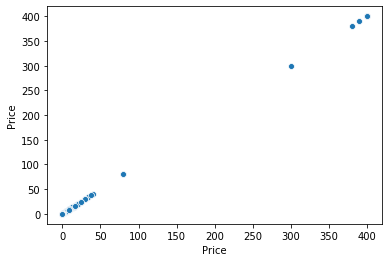

In [117]:
sns.scatterplot(x='Price',y='Price',data=df1)
plt.show()

### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [118]:
print('Yes we can expect apps on the play store to cost $200')
df1.loc[df1['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


### iii. After dropping the useless records, make the suitable plot again to identify outliers

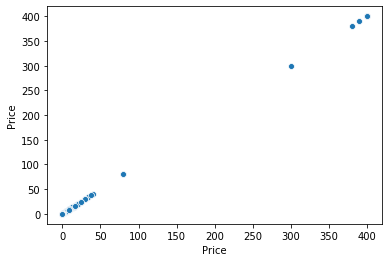

In [119]:
sns.scatterplot(x='Price',y='Price',data=df1)
plt.show()

### iv. Limit data to records with price < $30

In [120]:
df1.drop(df1.loc[df1['Price']>30].index, inplace=True)

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


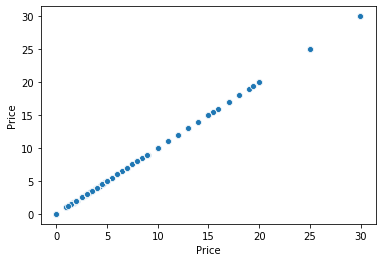

In [121]:
sns.scatterplot(x='Price',y='Price',data=df1)
plt.show()

# b. Reviews column
### i. Make suitable plot

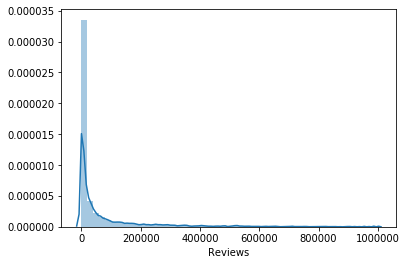

In [147]:
sns.distplot(df1['Reviews'])
plt.show()

### ii. Limit data to apps with < 1 Million reviews

In [123]:
df1.drop(df1.loc[df1['Reviews']>1000000].index, inplace=True)

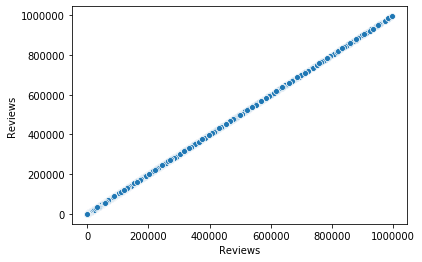

In [124]:
sns.scatterplot(x='Reviews',y='Reviews',data=df1)
plt.show()

## c. Installs
### i. What is the 95th percentile of the installs?

In [125]:
df1.Installs.quantile(0.95)

10000000.0

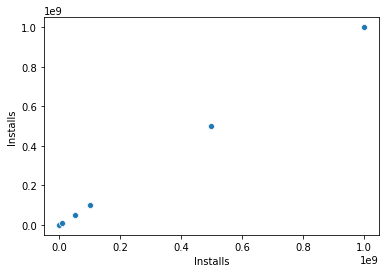

In [126]:
sns.scatterplot(x='Installs',y='Installs',data=df1)
plt.show()

### ii. Drop records having a value more than the 95th percentile

In [127]:
df1.drop(df1.loc[df1['Installs']>10000000.0].index, inplace=True)

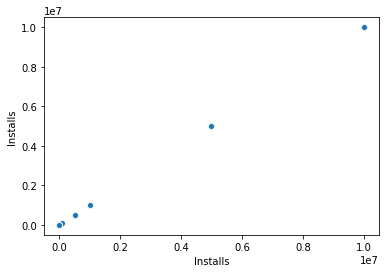

In [128]:
sns.scatterplot(x='Installs',y='Installs',data=df1)
plt.show()

# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
### a. How do you explain this?

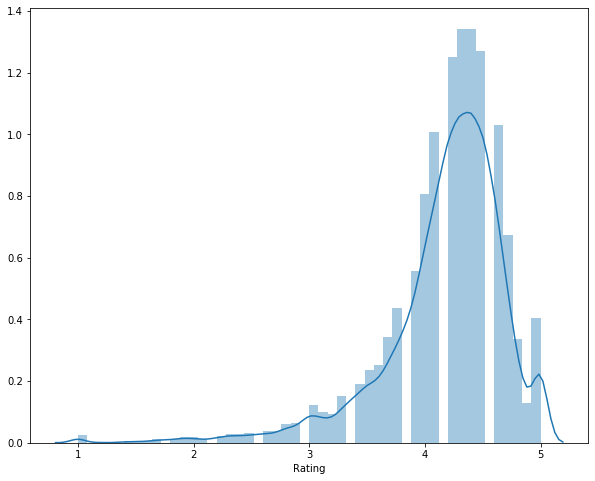

In [129]:
plt.figure(figsize=(10,8))
sns.distplot(df1['Rating'], bins=50)
plt.show()

### here we can see that plot is more skewed towards 4 and 5 which means most of the apps are rated  4 to 5 and which is a good sign for play store, It also means that people are liking the apps in the play store

## b. What is the implication of this on your analysis?

#### Answer-  This implies that customer are satisfied with the app, They are also liking the apps which is a good sign for google play store.

# 6. What are the top Content Rating values?

In [130]:
df1['Content Rating'].value_counts()

Everyone           6788
Teen                901
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### The content rating "Everyone" is the top with 6788

### a. Are there any values with very few records?

* Yes, the Content rating "Adults only 18+" and "Unrated" has very few records.

### b. If yes, drop those as they won’t help in the analysis

In [131]:
df1.drop(df1.loc[df1['Content Rating']=='Adults only 18+'].index, inplace=True)
df1.drop(df1.loc[df1['Content Rating']=='Unrated'].index, inplace=True)

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [132]:
df1['Content Rating'].value_counts()

Everyone        6788
Teen             901
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# 7. Effect of size on rating
### a. Make a joinplot to understand the effect of size on rating

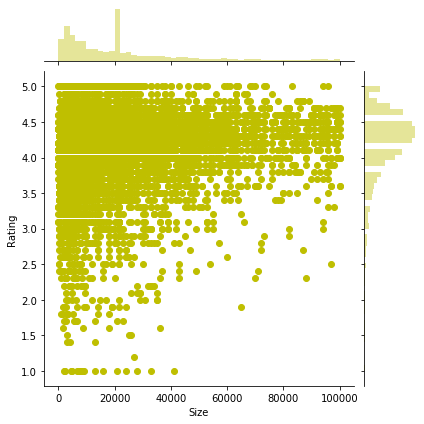

In [133]:
sns.jointplot("Size", "Rating", data=df1, color="y")
plt.show()

### here we can see that the apps having size aprox 20000 having most of the highest rating i.e. 4-5
* patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

# 8. Effect of price on rating
### a. Make a jointplot (with regression line)

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


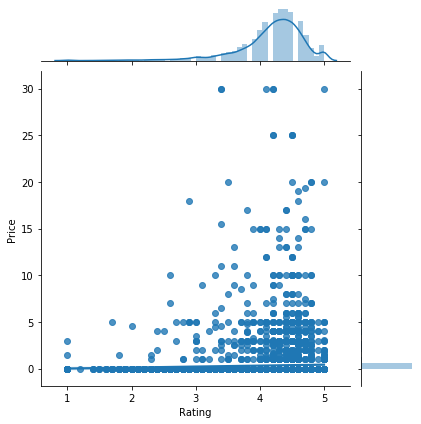

In [134]:
sns.jointplot(x = "Rating",y =  "Price", data=df1, kind='reg')
plt.show()

### here we can see that the most of the apps having approx 0 price and most of the apps having approx 0 price have most of the rating

### b. What pattern do you see?

The regression line passes through the zero on all the ratings

### c. How do you explain the pattern?

This means that most of the customers prefer free apps, no matter the rating the all the apps which are free are mostly used by the customers

### d. Replot the data, this time with only records with price > 0

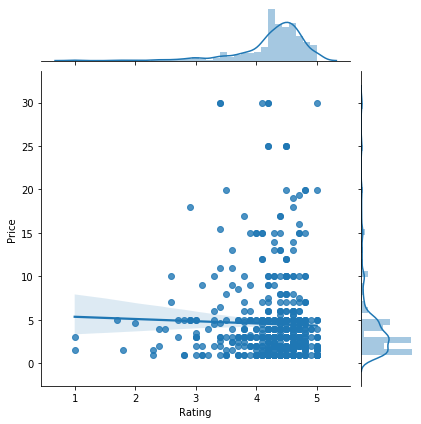

In [146]:
d1=df1.loc[df1.Price>0]
sns.jointplot(x='Rating', y='Price', data=d1, kind='reg')
plt.show()

### e. Does the pattern change?
Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

### f. What is your overall inference on the effect of price on the rating
Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together 
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

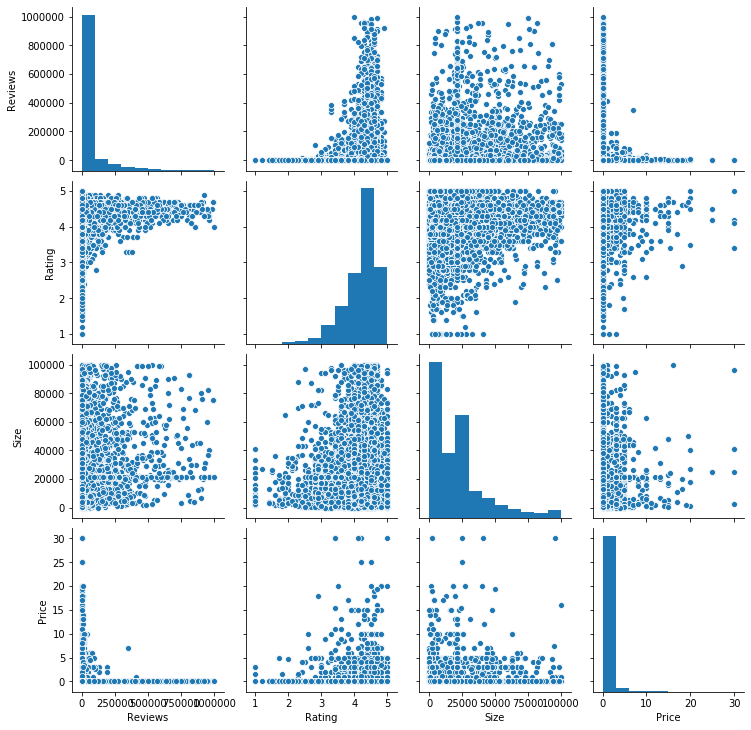

In [137]:
sns.pairplot(df1[['Reviews', 'Rating','Size','Price']] )
plt.show()

# 10. Rating vs. content rating
### a. Make a bar plot displaying the rating for each content rating

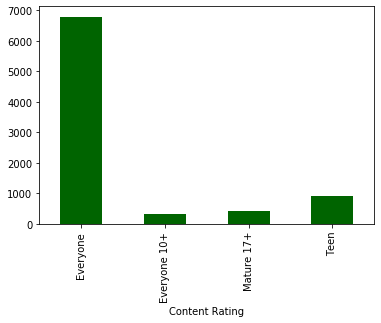

In [138]:
df1.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

## Which metric would you use? Mean? Median? Some other quantile?

## answer
We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

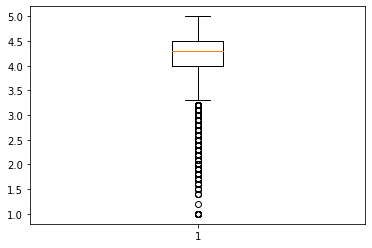

In [139]:
plt.boxplot(df1['Rating'])
plt.show()

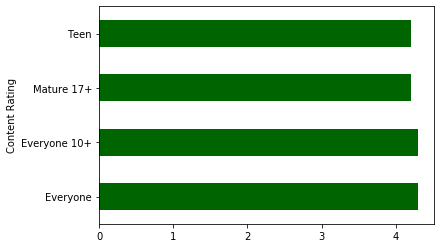

In [140]:
df1.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

## Task 11. Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size

In [141]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df1['Bucket Size'] = pd.cut(df1['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df1, values='Rating', index='Bucket Size', columns='Content Rating')

C:\Users\Mirza Razab Bharti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.146605,4.247561,4.010582,4.184469
20k-40k,4.200878,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [142]:
temp3=pd.pivot_table(df1, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


## c. Make a heatmap of this
i. Annotated

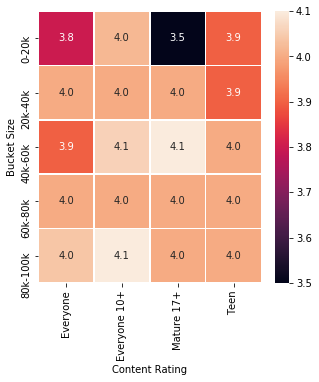

In [143]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

## ii.Greens color map

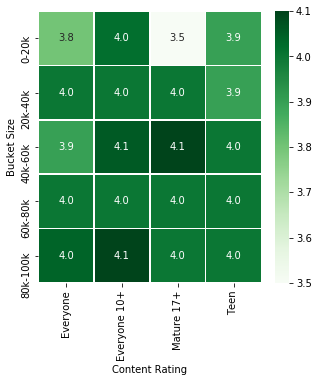

In [144]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

## d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
Based on analysis we can say that its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all categories. So, we can conclude that heavier apps are preferred in all categories.